# **Artificial Neural Network**

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

**Tensorflow Dropout Layer** : Regularization technique to control overfitting
in neural network.

**Adam Optimizer** : Adaptive Moment Estimation optimizer is the one of the most popular and effective algorithms for training deep neural networks. It combines the benefits of two other optimization methods **Momentum** and **RMSProp**.

**EarlyStopping Callback** : The Kears EarlyStopping Callback monitors a specified metric during training and automatically stops the process if the metric stops improving for a defined number of epochs.

**Creating a data (Regression Problem)**

In [11]:
np.random.seed(42)

X=np.random.rand(600,2)
y=4*X[:,0]+6*X[:,1]+np.random.randn(600)*0.2

In [12]:
# Splitting data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# Scaling the data
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Practice 1: Effect of Number of Neurons**

Train 3 models with different neurons(4, 16, 64)

In [14]:
def build_model(neurons):
  model=Sequential([Dense(neurons, activation='relu', input_shape=(2,)),
                    Dense(1)
                    ])
  model.compile(optimizer='adam',loss='mse',metrics=['mae'])
  return model

In [15]:
for n in [4, 16, 64]:
  print(f"\nTraining model with {n} neurons")
  model=build_model(n)
  model.fit(X_train,y_train,epochs=30,batch_size=32,verbose=0)
  print(model.evaluate(X_test,y_test))


Training model with 4 neurons


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 18.2454 - mae: 3.8627 
[19.011669158935547, 3.9483752250671387]

Training model with 16 neurons
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4959 - mae: 1.3257 
[2.4904489517211914, 1.3268623352050781]

Training model with 64 neurons
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4530 - mae: 0.5671 
[0.44928112626075745, 0.5576094388961792]


The **verbose=0** parameter in model fitting means that no output or logging messages will be displayed during the training process. The model will train in "silent mode," which is often used for production runs or batch processing where monitoring the progress in real-time is not necessary.

**Practice 2 : Effect of Activation Functions**

Relu, tanh, sigmoid

In [16]:
def build_activation_model(activation):
  model=Sequential([
      Dense(16, activation=activation,input_shape=(2,)),
      Dense(1)
  ])
  model.compile(optimizer='adam',loss='mse')
  return model

In [17]:
for act in ['relu','tanh','sigmoid']:
  print(f"\nActivation: {act}")
  model = build_activation_model(act)
  model.fit(X_train, y_train, epochs=30, verbose=0)
  print(model.evaluate(X_test,y_test))


Activation: relu
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2365 
1.2129470109939575

Activation: tanh
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6763  
0.7109176516532898

Activation: sigmoid
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.9409 
3.1860952377319336


**Practice 3 : Learning Rate Experiment**

Learning Rate : 0.1, 0.01, 0.001

In [18]:
for lr in [0.1,0.01,0.001]:
  print(f"\nLearning rate: {lr}")

  model = Sequential([
      Dense(16, activation='relu',input_shape=(2,)),
      Dense(1)
  ])

  model.compile(optimizer=Adam(learning_rate=lr),loss='mse')
  model.fit(X_train, y_train, epochs=30, verbose=0)
  print(model.evaluate(X_test,y_test))



Learning rate: 0.1
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0458 
0.04770714417099953

Learning rate: 0.01
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0548 
0.05751919001340866

Learning rate: 0.001
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.4881  
2.562166929244995


**Practice 4 : Batch Size Impact**

Batch Size = 8, 32, 128

In [19]:
for bs in [8, 32, 128]:
  print(f"\nBatch size: {bs}")

  model = Sequential([
      Dense(16, activation='relu',input_shape=(2,)),
      Dense(1)
  ])

  model.compile(optimizer='adam',loss='mse')
  model.fit(X_train,y_train,epochs=30,batch_size=bs, verbose=0)
  print(model.evaluate(X_test,y_test))


Batch size: 8
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2126  
0.2120523750782013

Batch size: 32
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1255  
1.0945647954940796

Batch size: 128
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 21.7778  
22.793216705322266


**Practice 5 : Overfitting and Regularization**

Step 1: Create Overfitting Model

Dense(128), Dense(128), Dense(64)

Step 2: Fixing it using

Dropout(0.3), L2 Regularization, EarlyStopping

**Overfitting Model**

In [20]:
model=Sequential([
    Dense(128,activation='relu',input_shape=(2,)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse')

history=model.fit(
    X_train, y_train,
    epochs=80,
    validation_split=0.2,
    verbose=0
)

The **validation_split=0.2** parameter in model fitting (typically in Keras/TensorFlow) automatically reserves the last 20% of the training data to be used for validation.

**Fixing model with Dropout and EarlyStopping**

In [21]:
model=Sequential([
    Dense(128, activation='relu',input_shape=(2,)),
    Dropout(0.3),
    Dense(64,activation='relu'),
    Dropout(0.3),
    Dense(1)
])

model.compile(optimizer='adam',loss='mse')

es=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)

history=model.fit(
    X_train, y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[es],verbose=0
)


**Practice 6 : Error Metrics**

In [22]:
y_pred=model.predict(X_test)

print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
MAE: 0.2052432504451226
MSE: 0.06591776722163095
RMSE 0.2567445563622157


**Practice 7 : ANN VS Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

y_lr=lr.predict(X_test)

print('Linear Regression MAE:',mean_absolute_error(y_test,y_lr))
print('ANN MAE:',mean_absolute_error(y_test,y_pred))

Linear Regression MAE: 0.16127674638972617
ANN MAE: 0.2052432504451226


**Practice 8 : Loss Curve Plot**

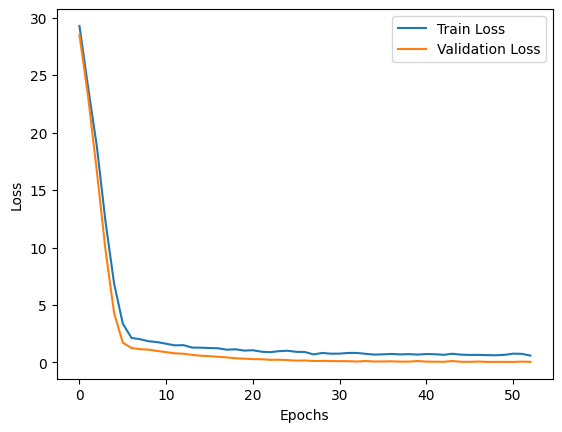

In [24]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()